In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import linregress
from windrose import WindroseAxes

sns.set(style="whitegrid")

In [33]:
# Accède aux données format CSV et les enregistre comme Dataframe Pandas dans un dictionnaire. Ajouter les données
data = {
    "MontStAnne": pd.read_csv(r"TP3/WxAlbert.csv", parse_dates=["Date"], index_col="Date"),
    "ErnestLaforce": pd.read_csv(r"TP3/WxErnest.csv", parse_dates=["Date"], index_col="Date") ,
    "MontAlbert": pd.read_csv(r"TP3/WxStAnne.csv", parse_dates=["Date"], index_col="Date"),
}

# Identifie l'élévation associé à chaque station
elevations = {"MontStAnne": 1145, "ErnestLaforce": 600, "MontAlbert": 230}

In [10]:
# Faire des graphiques de température de l'air

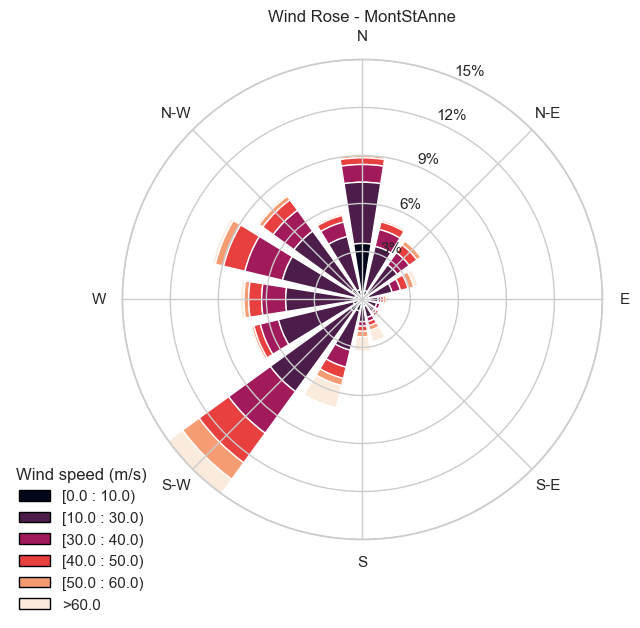

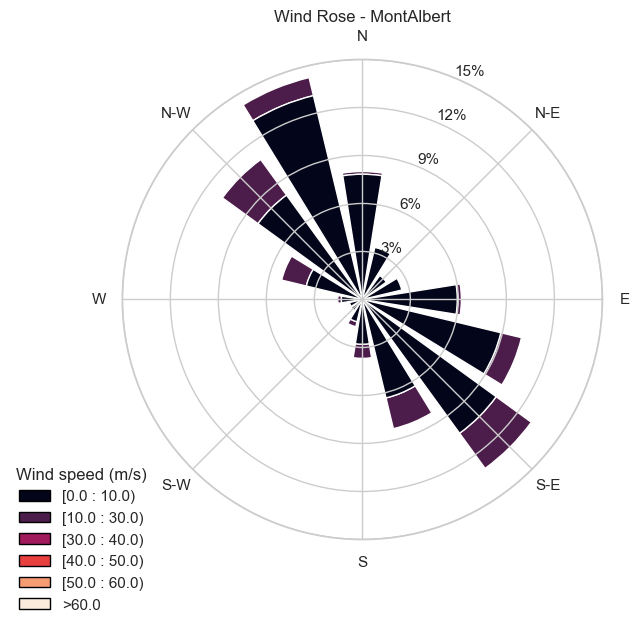

In [11]:
#Choisir vos catégories de vents
speed_bins = []
# Choisir votre pourcentage maximum
rmax = 
# Choisir les graduations de pourcentages
ticks = []
# Étiquette des graduations
tickslab = []

for station_name, df in data.items():
    if "VVi" not in df.columns:
        continue
    ws = df["VVi"]
    wd = df["VDi"]
    
    fig = plt.figure(figsize=(6,6))
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins=speed_bins)
    ax.set_rmax(rmax)
    ax.set_rticks(ticks)
    ax.set_yticklabels(tickslab)
    ax.legend(
        title="Wind speed (m/s)",
        loc='center left',
        bbox_to_anchor=(-0.25, 0),  # (x, y) relative to plot
        frameon=False)
    plt.title(f"Wind Rose - {station_name}")
    plt.show()

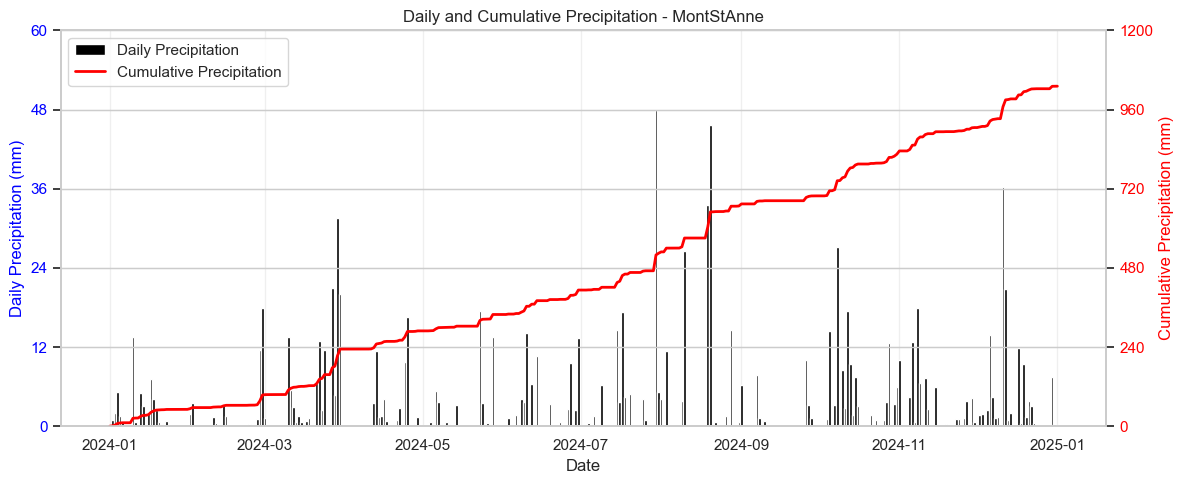

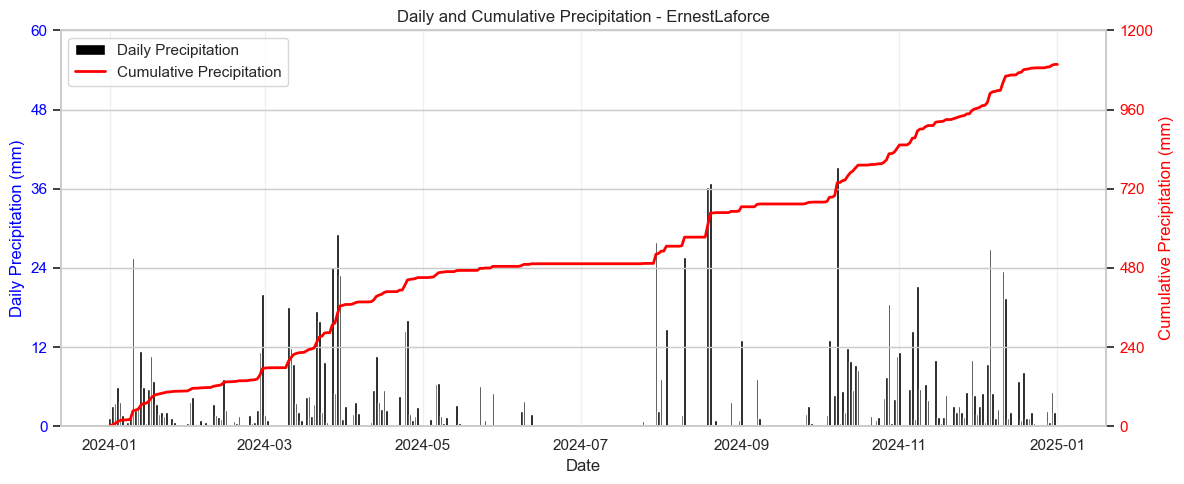

In [34]:
for station_name, df in data.items():
    if "PT" not in df.columns:
        continue
    
    # --- Precipitation data ---
    precip = df["PT"].resample("D").sum().fillna(0)
    precip = precip.loc["2024-01-01":"2025-01-01"]

    # Cumulative precipitation
    cum_precip = precip.cumsum()

    # --- Plot ---
    fig, ax1 = plt.subplots(figsize=(12,5))

    # Bar width = 1 day
    bar_width = pd.Timedelta(days=1)

    # Daily precipitation (bars)
    ax1.bar(precip.index, precip, 
            width=bar_width, 
            color='black', 
            label='Daily Precipitation')

    ax1.set_xlabel("Date")
    ax1.set_ylabel("Daily Precipitation (mm)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Secondary axis: cumulative precipitation
    ax2 = ax1.twinx()
    ax2.plot(precip.index, cum_precip, 
             color='red', linewidth=2, 
             label='Cumulative Precipitation')

    ax2.set_ylabel("Cumulative Precipitation (mm)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # --- FIX Y-AXES (must be done *after* all plotting) ---
    ax1.margins(0)
    ax2.margins(0)

    ax1.autoscale(enable=False)
    ax2.autoscale(enable=False)

    # Your fixed limits
    ax1.set_ylim(0, 60)
    ax2.set_ylim(0, 1200)

    # Matching tick count (optional but looks great)
    ax1.set_yticks(np.linspace(0, 60, 6))
    ax2.set_yticks(np.linspace(0, 1200, 6))

    # Title and grid
    ax1.grid(True, alpha=0.3)
    plt.title(f"Daily and Cumulative Precipitation - {station_name}")

    # Combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()
